In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**load the csv**

In [2]:
Data =pd.read_csv("titanic_full.csv")

In [3]:
print(Data.head())

   Pclass     Fare  Survived
0       3   7.2500         0
1       1  71.2833         1
2       3   7.9250         1
3       1  53.1000         1
4       3   8.0500         0


**Check the null value**

In [4]:
Data.isnull().sum()

Pclass      0
Fare        0
Survived    0
dtype: int64

**There are no null values in the data**

**Plot the data**

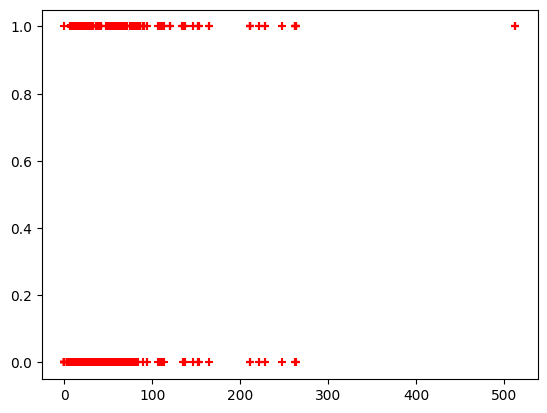

In [5]:
plt.scatter(Data['Fare'],Data['Survived'], c='r',marker='+')
plt.show()

**Separate the Features a target in x and y**

In [6]:
Features = Data.drop('Survived',axis=1)
target = Data[['Survived']]

**Split the train and test data**

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(Features,target, test_size=0.20, random_state=1)

**Make the model Binary logistic regression model**

In [8]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train,Y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
Y_prediction = LR_Model.predict(X_test)

**Check the model score**

In [10]:
print(f"Accuracy:{round(accuracy_score(Y_test, Y_prediction)*100)}%\n")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test,Y_prediction)}\n")
print(f"Classification Report:\n{classification_report(Y_test,Y_prediction)}\n")

Accuracy:69%

Confusion Matrix:
[[146  15]
 [ 66  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       161
           1       0.70      0.35      0.46       101

    accuracy                           0.69       262
   macro avg       0.69      0.63      0.62       262
weighted avg       0.69      0.69      0.66       262




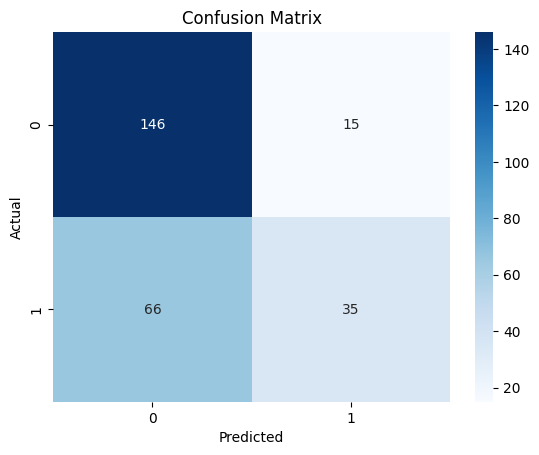

In [11]:
heatmap = sns.heatmap(confusion_matrix(Y_test, Y_prediction), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


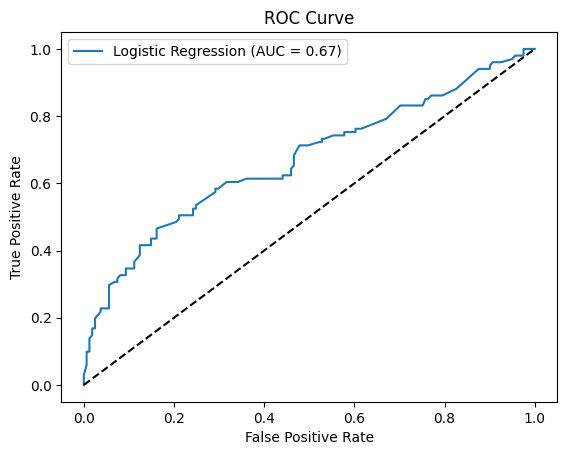

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = LR_Model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(Y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


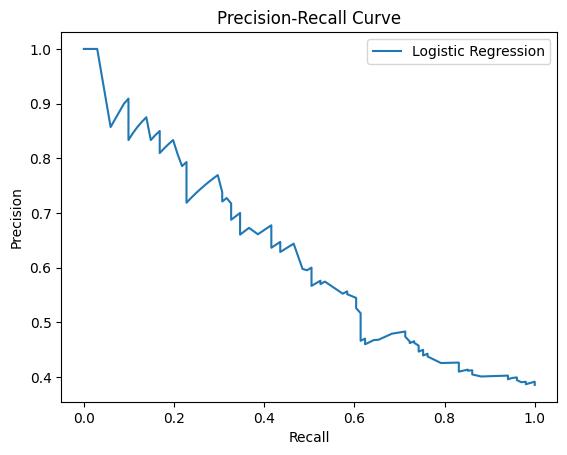

In [13]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob)

# Plot precision-recall curve
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


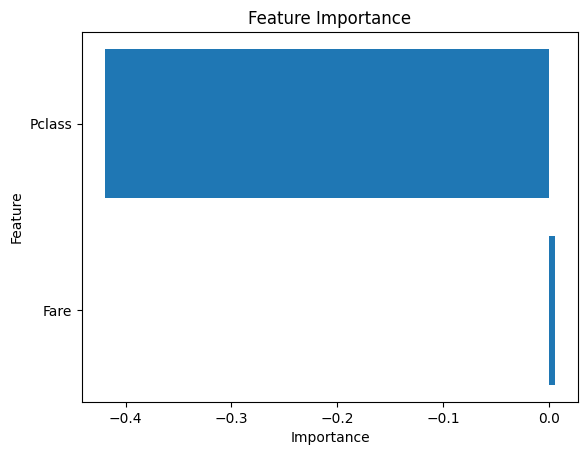

In [14]:
feature_importance = pd.DataFrame({'Feature': Features.columns, 'Importance': LR_Model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


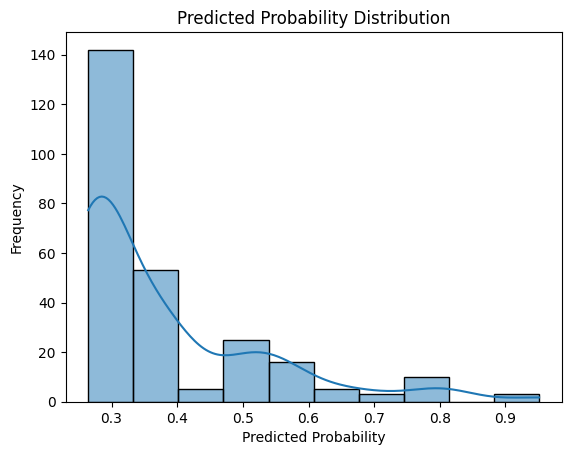

In [15]:
sns.histplot(y_prob, bins=10, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.show()
